<a href="https://colab.research.google.com/github/ali1810/Data_preprocessing_with-BI/blob/main/data_cleaning_business_question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required library 
import pandas as pd 


In [ ]:
# Merging the different month dataset in to one file 
import os
import glob
import pandas as pd
os.chdir("/content/drive/My Drive/Sales_Data")


In [ ]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]



In [ ]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Sales_Data/combined_csv.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [ ]:
# Data cleaning 

#1> Finding the NAN values in Dataset 
nan_df=data[data.isna().any(axis=1)]
nan_df.head()

#2> Removing the values with NAN 
data=data.dropna(how="all")
data.count()



Order ID            186305
Product             186305
Quantity Ordered    186305
Price Each          186305
Order Date          186305
Purchase Address    186305
dtype: int64

In [ ]:
# Find or and delete it 
data_new =data[data['Order Date'].str[0:2] !='Or']
data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [ ]:
# Augment data with additional column 
# Add month column 
data_new['Month'] =data_new['Order Date'].str[0:2]
data_new['Month'] =data_new['Month'].astype('int32')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# convert the column to correct types 
data_new['Price Each'] =pd.to_numeric(data_new['Price Each'])
data_new['Quantity Ordered'] =pd.to_numeric(data_new['Quantity Ordered'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Add city column 

# Lets use . apply method to extract the city name from column purchase address.
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

data_new['City']=data_new['Purchase Address'].apply(lambda x: get_city(x) +' '+ get_state(x))
data_new.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


In [ ]:
## Finding month which has maximum sales 

#  Add sales column to dataframe 

data_new['Sales']=data_new['Price Each']*data_new['Quantity Ordered']
data_new.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [ ]:
results=data_new.groupby('Month').sum()

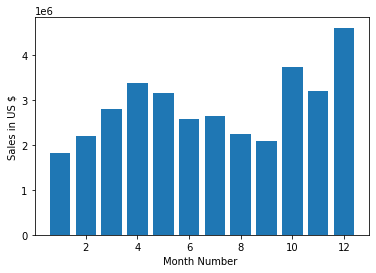

In [ ]:
import matplotlib.pyplot as plt

month =range(1,13)
plt.bar(month,results['Sales'])

plt.xlabel("Month Number ")
plt.ylabel("Sales in US $")
plt.show()


In [ ]:
## What city does had highest number of sales 
data_new.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


                   Quantity Ordered    Price Each   Month         Sales
City                                                                   
 Atlanta GA                   16602  2.779908e+06  104794  2.795499e+06
 Austin TX                    11153  1.809874e+06   69829  1.819582e+06
 Boston MA                    22528  3.637410e+06  141112  3.661642e+06
 Dallas TX                    16730  2.752628e+06  104620  2.767975e+06
 Los Angeles CA               33289  5.421435e+06  208325  5.452571e+06
 New York City NY             27932  4.635371e+06  175741  4.664317e+06
 Portland ME                   2750  4.471893e+05   17144  4.497583e+05
 Portland OR                  11303  1.860558e+06   70621  1.870732e+06
 San Francisco CA             50239  8.211462e+06  315520  8.262204e+06
 Seattle WA                   16553  2.733296e+06  104941  2.747755e+06


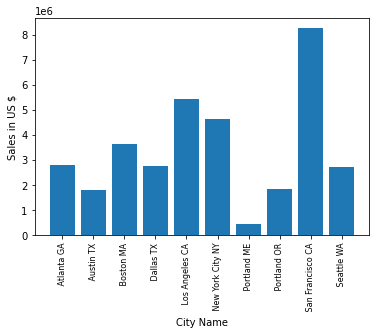

In [ ]:
results1=data_new.groupby('City').sum()
print(results1)
import matplotlib.pyplot as plt
cities= [city for city ,df in data_new.groupby('City')]

plt.bar(cities, results1['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.xlabel("City Name")
plt.ylabel("Sales in US $")
plt.show()


In [ ]:
### What time should display the advertisement to increase the sales...
## Changing date string datetime object 
data_new['Order Date']=pd.to_datetime(data_new['Order Date'])
## Taking out Hour from datetime 
data_new['Hour']=data_new['Order Date'].dt.hour
data_new['Minute']=data_new['Order Date'].dt.minute
data_new.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12,38


In [ ]:
results1=data_new.groupby('City').sum()
print(results1)

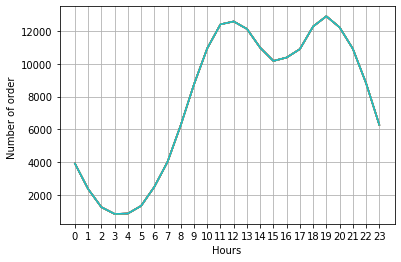

In [ ]:
#results1=data_new.groupby('Hour')
#print(results1)
import matplotlib.pyplot as plt
hours= [hour for hour ,df in data_new.groupby('Hour')]

plt.plot(hours, data_new.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel("Hours")
plt.grid()
plt.ylabel("Number of order ")
plt.show()


In [ ]:
### What profuct most often sold together ...
#data_new.head(500)
df=data_new[data_new['Order ID'].duplicated(keep=False)] 
df['Grouped_item']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID','Grouped_item']].drop_duplicates() 
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Grouped_item
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [ ]:
!pip install itertools

ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools


In [ ]:

from intertools import combinations
from collections import Counter 

count=Counter()

for row in df['Grouped_item']:
   row_list=row.split(',')
   count.update(Counter(combinations(row_list,2)))
count.most_common(10)
print(count)

ModuleNotFoundError: ignored

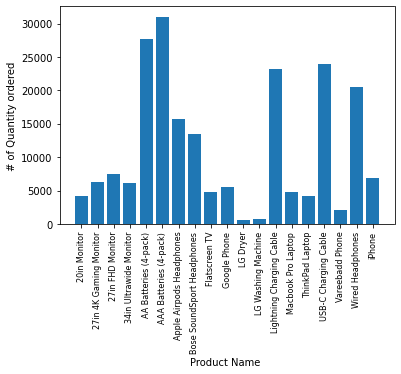

In [ ]:
# Which product has more ordered  and what could be reason

Product_group=data_new.groupby('Product')
Quantity_ordered=Product_group.sum()['Quantity Ordered']

products=[product for product, df in Product_group]
plt.bar(products,Quantity_ordered)
plt.xticks(products,rotation='vertical',size=8)
plt.xlabel("Product Name ")
plt.ylabel("# of Quantity ordered")
plt.show()

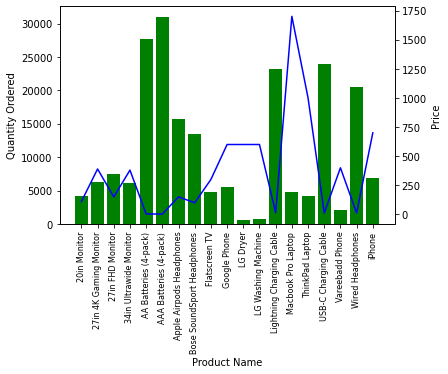

In [ ]:
prices=data_new.groupby('Product').mean()['Price Each']
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,Quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()